In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()
  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))
  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""
  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=None,
                      epochs=epochs)
  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]
  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)
  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]
  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [4]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""
  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")
  # Plot the feature values vs. label values.
  plt.scatter(feature, label)
  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')
  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [5]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Train on 12 samples
Epoch 1/300
12/12 [==============================] - 1s 44ms/sample - loss: 744.9016 - root_mean_squared_error: 27.2929
Epoch 2/300
12/12 [==============================] - 0s 1ms/sample - loss: 730.7292 - root_mean_squared_error: 27.0320
Epoch 3/300
12/12 [==============================] - 0s 1ms/sample - loss: 720.5791 - root_mean_squared_error: 26.8436
Epoch 4/300
12/12 [==============================] - 0s 1ms/sample - loss: 712.1581 - root_mean_squared_error: 26.6863
Epoch 5/300
12/12 [==============================] - 0s 1ms/sample - loss: 704.7397 - root_mean_squared_error: 26.5469
Epoch 6/300
12/12 [==============================] - 0s 0s/sample - loss: 697.9873 - root_mean_squared_error: 26.4194
Epoch 7/300
12/12 [==============================] - 0s 1ms/sample - loss: 691.7131 - root_mean_squared_error: 26.3004
Epoch 8/300
12/12 [==============================] - 0s 1ms/sample - loss: 685.8010 - root_mean_squared_error: 26.1878
Epoch 9/300
12/12 [=========

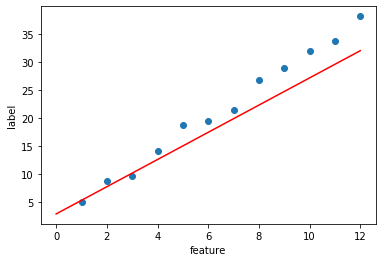

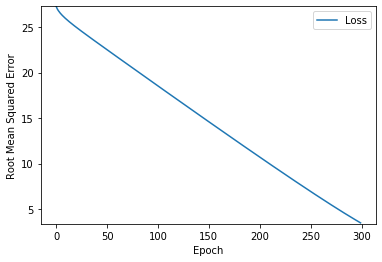

In [6]:
learning_rate = 0.01
epochs = 300
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/500
12/12 [==============================] - 1s 97ms/sample - loss: 658.6859 - root_mean_squared_error: 25.6649
Epoch 2/500
12/12 [==============================] - 0s 545us/sample - loss: 6683416.0000 - root_mean_squared_error: 2585.2305
Epoch 3/500
12/12 [==============================] - 0s 0s/sample - loss: 652.7722 - root_mean_squared_error: 25.5494
Epoch 4/500
12/12 [==============================] - 0s 1ms/sample - loss: 3.7602 - root_mean_squared_error: 1.9391
Epoch 5/500
12/12 [==============================] - 0s 1ms/sample - loss: 1.0836 - root_mean_squared_error: 1.0410
Epoch 6/500
12/12 [==============================] - 0s 1ms/sample - loss: 1.0344 - root_mean_squared_error: 1.0171
Epoch 7/500
12/12 [==============================] - 0s 2ms/sample - loss: 1.0230 - root_mean_squared_error: 1.0114
Epoch 8/500
12/12 [==============================] - 0s 1ms/sample - loss: 1.0129 - root_mean_squared_error: 1.0064
Epoch 9/500
12/12 [================

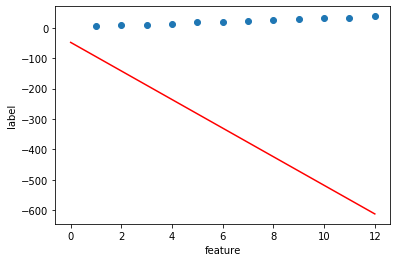

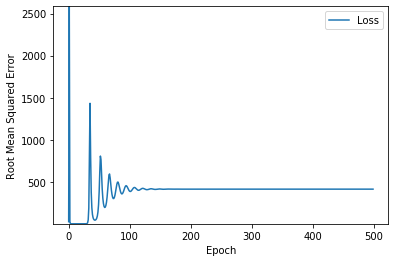

In [7]:
learning_rate = 100
epochs = 500
#my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/50
12/12 [==============================] - 1s 49ms/sample - loss: 1101.7113 - root_mean_squared_error: 33.1920
Epoch 2/50
12/12 [==============================] - 0s 1ms/sample - loss: 9483.7217 - root_mean_squared_error: 97.3844
Epoch 3/50
12/12 [==============================] - 0s 1ms/sample - loss: 722.1566 - root_mean_squared_error: 26.8730
Epoch 4/50
12/12 [==============================] - 0s 543us/sample - loss: 64.6986 - root_mean_squared_error: 8.0435
Epoch 5/50
12/12 [==============================] - 0s 1ms/sample - loss: 9.7527 - root_mean_squared_error: 3.1229
Epoch 6/50
12/12 [==============================] - 0s 1ms/sample - loss: 3.0132 - root_mean_squared_error: 1.7359
Epoch 7/50
12/12 [==============================] - 0s 1ms/sample - loss: 1.8193 - root_mean_squared_error: 1.3488
Epoch 8/50
12/12 [==============================] - 0s 1ms/sample - loss: 1.5115 - root_mean_squared_error: 1.2294
Epoch 9/50
12/12 [===========================

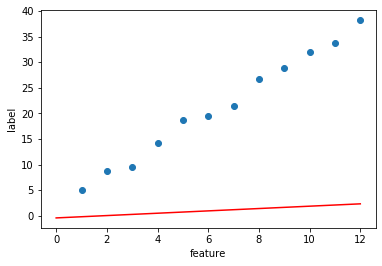

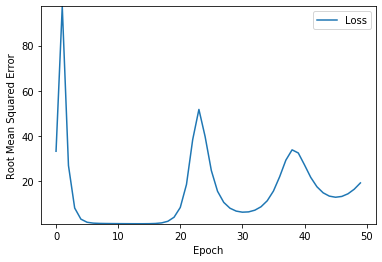

In [8]:
learning_rate = 5
epochs = 50
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/50
12/12 [==============================] - 0s 38ms/sample - loss: 1223.6737 - root_mean_squared_error: 34.9810
Epoch 2/50
12/12 [==============================] - 0s 1ms/sample - loss: 299.7914 - root_mean_squared_error: 17.3145
Epoch 3/50
12/12 [==============================] - 0s 1ms/sample - loss: 48.6305 - root_mean_squared_error: 6.9736
Epoch 4/50
12/12 [==============================] - 0s 1ms/sample - loss: 10.9786 - root_mean_squared_error: 3.3134
Epoch 5/50
12/12 [==============================] - 0s 1ms/sample - loss: 4.1020 - root_mean_squared_error: 2.0253
Epoch 6/50
12/12 [==============================] - 0s 2ms/sample - loss: 2.4386 - root_mean_squared_error: 1.5616
Epoch 7/50
12/12 [==============================] - 0s 1ms/sample - loss: 1.9051 - root_mean_squared_error: 1.3803
Epoch 8/50
12/12 [==============================] - 0s 1ms/sample - loss: 1.6822 - root_mean_squared_error: 1.2970
Epoch 9/50
12/12 [==============================] 

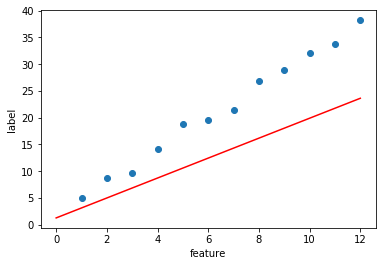

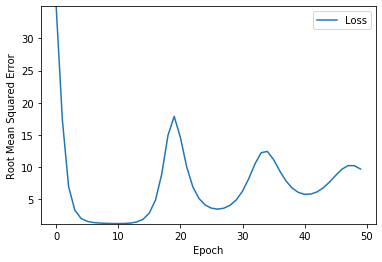

In [9]:
learning_rate = 2
epochs = 50
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/300
12/12 [==============================] - 0s 35ms/sample - loss: 857.6269 - root_mean_squared_error: 29.2853
Epoch 2/300
12/12 [==============================] - 0s 1ms/sample - loss: 53743.7148 - root_mean_squared_error: 231.8269
Epoch 3/300
12/12 [==============================] - 0s 1ms/sample - loss: 752.6503 - root_mean_squared_error: 27.4345
Epoch 4/300
12/12 [==============================] - 0s 1ms/sample - loss: 22.9214 - root_mean_squared_error: 4.7876
Epoch 5/300
12/12 [==============================] - 0s 1ms/sample - loss: 2.4062 - root_mean_squared_error: 1.5512
Epoch 6/300
12/12 [==============================] - 0s 1ms/sample - loss: 1.3136 - root_mean_squared_error: 1.1461
Epoch 7/300
12/12 [==============================] - 0s 1ms/sample - loss: 1.1993 - root_mean_squared_error: 1.0951
Epoch 8/300
12/12 [==============================] - 0s 1ms/sample - loss: 1.1647 - root_mean_squared_error: 1.0792
Epoch 9/300
12/12 [===================

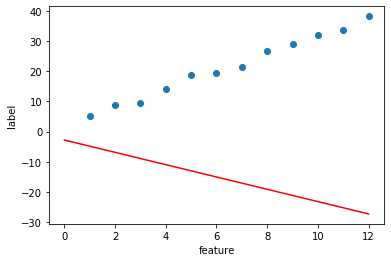

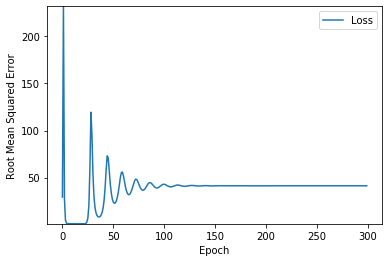

In [10]:
learning_rate = 10
epochs = 300
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/200
12/12 [==============================] - 1s 79ms/sample - loss: 280.7997 - root_mean_squared_error: 16.7571
Epoch 2/200
12/12 [==============================] - 0s 2ms/sample - loss: 88.8263 - root_mean_squared_error: 9.4248
Epoch 3/200
12/12 [==============================] - 0s 839us/sample - loss: 16.1148 - root_mean_squared_error: 4.0143
Epoch 4/200
12/12 [==============================] - 0s 834us/sample - loss: 4.0610 - root_mean_squared_error: 2.0152
Epoch 5/200
12/12 [==============================] - 0s 1ms/sample - loss: 1.7641 - root_mean_squared_error: 1.3282
Epoch 6/200
12/12 [==============================] - 0s 1ms/sample - loss: 1.2053 - root_mean_squared_error: 1.0979
Epoch 7/200
12/12 [==============================] - 0s 1ms/sample - loss: 1.0354 - root_mean_squared_error: 1.0175
Epoch 8/200
12/12 [==============================] - 0s 1ms/sample - loss: 0.9746 - root_mean_squared_error: 0.9872
Epoch 9/200
12/12 [=======================

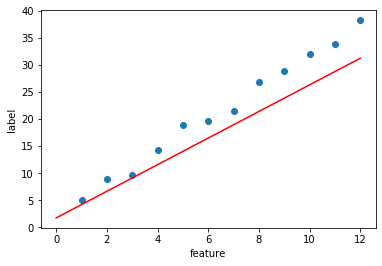

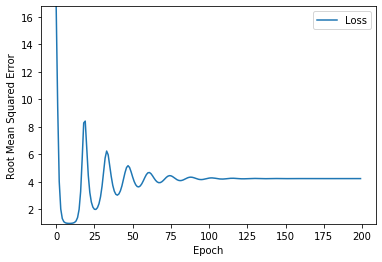

In [11]:
learning_rate = 1
epochs = 200
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/20
12/12 [==============================] - 1s 64ms/sample - loss: 940.6393 - root_mean_squared_error: 30.6698
Epoch 2/20
12/12 [==============================] - 0s 1ms/sample - loss: 21.9898 - root_mean_squared_error: 4.6893
Epoch 3/20
12/12 [==============================] - 0s 1ms/sample - loss: 1.6351 - root_mean_squared_error: 1.2787
Epoch 4/20
12/12 [==============================] - 0s 1ms/sample - loss: 1.3501 - root_mean_squared_error: 1.1619
Epoch 5/20
12/12 [==============================] - 0s 2ms/sample - loss: 1.3246 - root_mean_squared_error: 1.1509
Epoch 6/20
12/12 [==============================] - 0s 1ms/sample - loss: 1.3002 - root_mean_squared_error: 1.1403
Epoch 7/20
12/12 [==============================] - 0s 1ms/sample - loss: 1.2759 - root_mean_squared_error: 1.1296
Epoch 8/20
12/12 [==============================] - 0s 1ms/sample - loss: 1.2518 - root_mean_squared_error: 1.1188
Epoch 9/20
12/12 [==============================] - 0s 

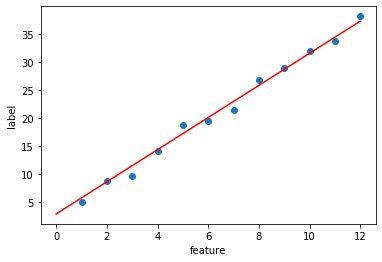

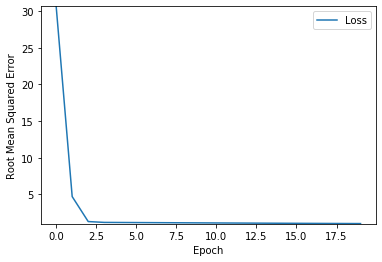

In [12]:
learning_rate = 1
epochs = 20
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/10
12/12 [==============================] - 1s 71ms/sample - loss: 599.0029 - root_mean_squared_error: 24.4745
Epoch 2/10
12/12 [==============================] - 0s 1ms/sample - loss: 3.7485 - root_mean_squared_error: 1.9361
Epoch 3/10
12/12 [==============================] - 0s 544us/sample - loss: 1.0428 - root_mean_squared_error: 1.0212
Epoch 4/10
12/12 [==============================] - 0s 1ms/sample - loss: 0.9953 - root_mean_squared_error: 0.9976
Epoch 5/10
12/12 [==============================] - 0s 1ms/sample - loss: 0.9863 - root_mean_squared_error: 0.9931
Epoch 6/10
12/12 [==============================] - 0s 3ms/sample - loss: 0.9787 - root_mean_squared_error: 0.9893
Epoch 7/10
12/12 [==============================] - 0s 1ms/sample - loss: 0.9712 - root_mean_squared_error: 0.9855
Epoch 8/10
12/12 [==============================] - 0s 1ms/sample - loss: 0.9640 - root_mean_squared_error: 0.9818
Epoch 9/10
12/12 [==============================] - 0s

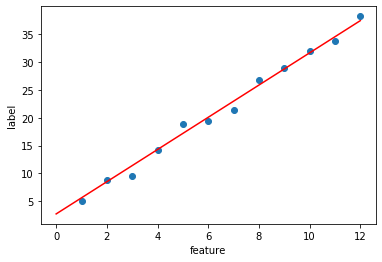

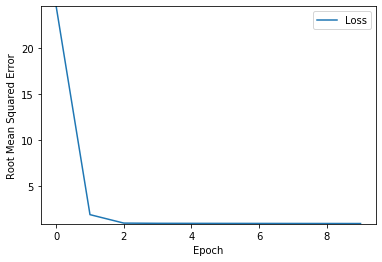

In [13]:
learning_rate = 1
epochs = 10
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/15
12/12 [==============================] - 1s 59ms/sample - loss: 571.7266 - root_mean_squared_error: 23.9108
Epoch 2/15
12/12 [==============================] - 0s 2ms/sample - loss: 5.9096 - root_mean_squared_error: 2.4310
Epoch 3/15
12/12 [==============================] - 0s 1ms/sample - loss: 1.0859 - root_mean_squared_error: 1.0421
Epoch 4/15
12/12 [==============================] - 0s 1ms/sample - loss: 0.9783 - root_mean_squared_error: 0.9891
Epoch 5/15
12/12 [==============================] - 0s 3ms/sample - loss: 0.9675 - root_mean_squared_error: 0.9836
Epoch 6/15
12/12 [==============================] - 0s 2ms/sample - loss: 0.9608 - root_mean_squared_error: 0.9802
Epoch 7/15
12/12 [==============================] - 0s 3ms/sample - loss: 0.9545 - root_mean_squared_error: 0.9770
Epoch 8/15
12/12 [==============================] - 0s 1ms/sample - loss: 0.9484 - root_mean_squared_error: 0.9739
Epoch 9/15
12/12 [==============================] - 0s 2

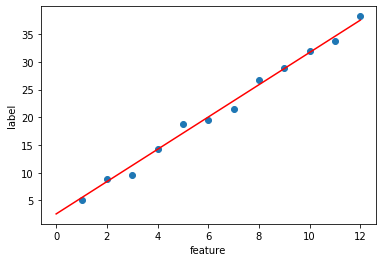

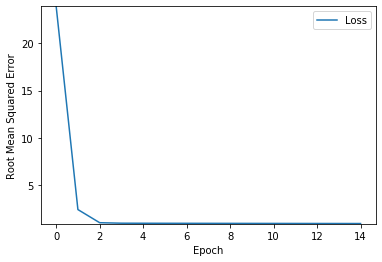

In [14]:
learning_rate = 1
epochs = 15
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/20
12/12 [==============================] - 1s 62ms/sample - loss: 504.9702 - root_mean_squared_error: 22.4715
Epoch 2/20
12/12 [==============================] - 0s 1ms/sample - loss: 14.3210 - root_mean_squared_error: 3.7843
Epoch 3/20
12/12 [==============================] - 0s 1ms/sample - loss: 1.5146 - root_mean_squared_error: 1.2307
Epoch 4/20
12/12 [==============================] - 0s 1ms/sample - loss: 0.9740 - root_mean_squared_error: 0.9869
Epoch 5/20
12/12 [==============================] - 0s 1ms/sample - loss: 0.9320 - root_mean_squared_error: 0.9654
Epoch 6/20
12/12 [==============================] - 0s 546us/sample - loss: 0.9241 - root_mean_squared_error: 0.9613
Epoch 7/20
12/12 [==============================] - 0s 3ms/sample - loss: 0.9197 - root_mean_squared_error: 0.9590
Epoch 8/20
12/12 [==============================] - 0s 1ms/sample - loss: 0.9160 - root_mean_squared_error: 0.9571
Epoch 9/20
12/12 [==============================] - 0

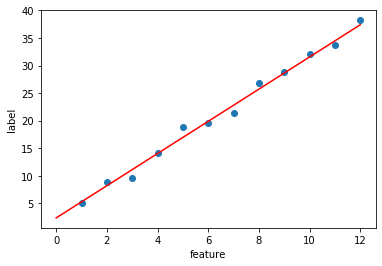

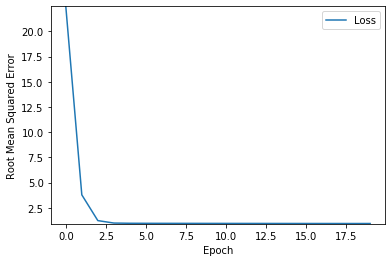

In [15]:
learning_rate = 1
epochs = 20
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/12
12/12 [==============================] - 1s 76ms/sample - loss: 1254.6245 - root_mean_squared_error: 35.4207
Epoch 2/12
12/12 [==============================] - 0s 1ms/sample - loss: 88.0797 - root_mean_squared_error: 9.3851
Epoch 3/12
12/12 [==============================] - 0s 1ms/sample - loss: 7.2443 - root_mean_squared_error: 2.6915
Epoch 4/12
12/12 [==============================] - 0s 1ms/sample - loss: 2.0360 - root_mean_squared_error: 1.4269
Epoch 5/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.7597 - root_mean_squared_error: 1.3265
Epoch 6/12
12/12 [==============================] - 0s 2ms/sample - loss: 1.7125 - root_mean_squared_error: 1.3086
Epoch 7/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.6718 - root_mean_squared_error: 1.2930
Epoch 8/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.6312 - root_mean_squared_error: 1.2772
Epoch 9/12
12/12 [==============================] - 0s

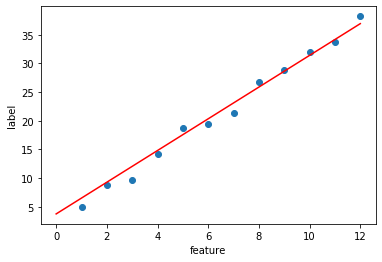

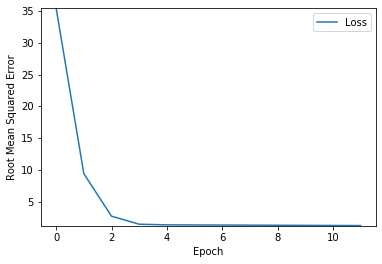

In [16]:
learning_rate = 1
epochs = 12
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/20
12/12 [==============================] - 1s 71ms/sample - loss: 416.8505 - root_mean_squared_error: 20.4169
Epoch 2/20
12/12 [==============================] - 0s 2ms/sample - loss: 33.5403 - root_mean_squared_error: 5.7914
Epoch 3/20
12/12 [==============================] - 0s 1ms/sample - loss: 3.7170 - root_mean_squared_error: 1.9280
Epoch 4/20
12/12 [==============================] - 0s 1ms/sample - loss: 1.2550 - root_mean_squared_error: 1.1203
Epoch 5/20
12/12 [==============================] - 0s 1ms/sample - loss: 0.9577 - root_mean_squared_error: 0.9786
Epoch 6/20
12/12 [==============================] - 0s 2ms/sample - loss: 0.9063 - root_mean_squared_error: 0.9520
Epoch 7/20
12/12 [==============================] - 0s 1ms/sample - loss: 0.8938 - root_mean_squared_error: 0.9454
Epoch 8/20
12/12 [==============================] - 0s 1ms/sample - loss: 0.8894 - root_mean_squared_error: 0.9431
Epoch 9/20
12/12 [==============================] - 0s 

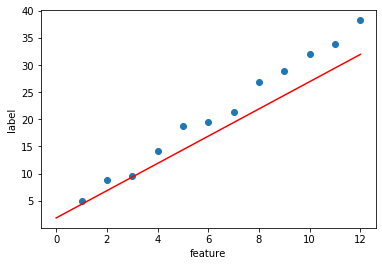

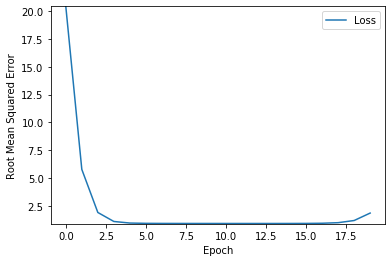

In [17]:
learning_rate = 1
epochs = 20
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


Train on 12 samples
Epoch 1/12
12/12 [==============================] - 1s 78ms/sample - loss: 553.8047 - root_mean_squared_error: 23.5331
Epoch 2/12
12/12 [==============================] - 0s 1ms/sample - loss: 7.7146 - root_mean_squared_error: 2.7775
Epoch 3/12
12/12 [==============================] - 0s 544us/sample - loss: 1.1454 - root_mean_squared_error: 1.0702
Epoch 4/12
12/12 [==============================] - 0s 1ms/sample - loss: 0.9703 - root_mean_squared_error: 0.9850
Epoch 5/12
12/12 [==============================] - 0s 1ms/sample - loss: 0.9562 - root_mean_squared_error: 0.9779
Epoch 6/12
12/12 [==============================] - 0s 1ms/sample - loss: 0.9499 - root_mean_squared_error: 0.9746
Epoch 7/12
12/12 [==============================] - 0s 1ms/sample - loss: 0.9443 - root_mean_squared_error: 0.9718
Epoch 8/12
12/12 [==============================] - 0s 2ms/sample - loss: 0.9389 - root_mean_squared_error: 0.9690
Epoch 9/12
12/12 [==============================] - 0s

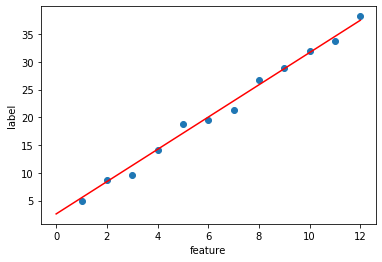

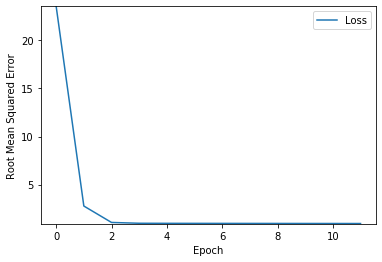

In [18]:
learning_rate = 1
epochs = 12
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


Train on 12 samples
Epoch 1/12
12/12 [==============================] - 1s 48ms/sample - loss: 1253.0024 - root_mean_squared_error: 35.3978
Epoch 2/12
12/12 [==============================] - 0s 1ms/sample - loss: 87.6527 - root_mean_squared_error: 9.3623
Epoch 3/12
12/12 [==============================] - 0s 542us/sample - loss: 7.1901 - root_mean_squared_error: 2.6814
Epoch 4/12
12/12 [==============================] - 0s 1ms/sample - loss: 2.0297 - root_mean_squared_error: 1.4247
Epoch 5/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.7571 - root_mean_squared_error: 1.3256
Epoch 6/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.7101 - root_mean_squared_error: 1.3077
Epoch 7/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.6696 - root_mean_squared_error: 1.2921
Epoch 8/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.6290 - root_mean_squared_error: 1.2763
Epoch 9/12
12/12 [==============================] - 

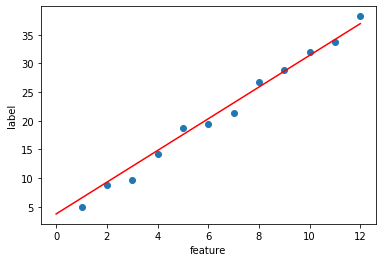

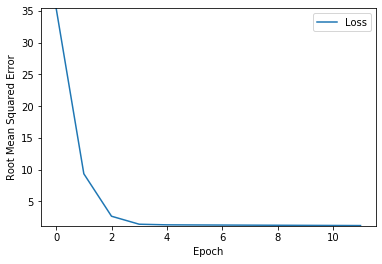

In [19]:
learning_rate = 1
epochs = 12
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


Train on 12 samples
Epoch 1/70
12/12 [==============================] - 0s 35ms/sample - loss: 554.3096 - root_mean_squared_error: 23.5438
Epoch 2/70
12/12 [==============================] - 0s 1ms/sample - loss: 395.7060 - root_mean_squared_error: 19.8924
Epoch 3/70
12/12 [==============================] - 0s 0s/sample - loss: 305.0339 - root_mean_squared_error: 17.4652
Epoch 4/70
12/12 [==============================] - 0s 1ms/sample - loss: 241.9095 - root_mean_squared_error: 15.5534
Epoch 5/70
12/12 [==============================] - 0s 1ms/sample - loss: 194.4451 - root_mean_squared_error: 13.9444
Epoch 6/70
12/12 [==============================] - 0s 544us/sample - loss: 157.3060 - root_mean_squared_error: 12.5422
Epoch 7/70
12/12 [==============================] - 0s 1ms/sample - loss: 127.5704 - root_mean_squared_error: 11.2947
Epoch 8/70
12/12 [==============================] - 0s 0s/sample - loss: 103.4331 - root_mean_squared_error: 10.1702
Epoch 9/70
12/12 [=================

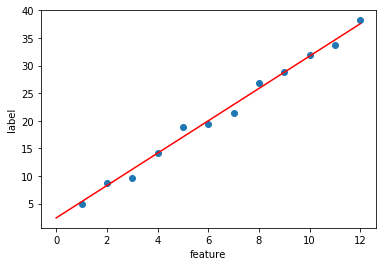

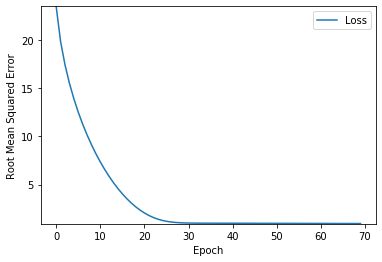

In [20]:
learning_rate = 0.14
epochs = 70
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/12
12/12 [==============================] - 0s 38ms/sample - loss: 476.6991 - root_mean_squared_error: 21.8334
Epoch 2/12
12/12 [==============================] - 0s 0s/sample - loss: 19.3815 - root_mean_squared_error: 4.4024
Epoch 3/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.9415 - root_mean_squared_error: 1.3934
Epoch 4/12
12/12 [==============================] - 0s 1ms/sample - loss: 1.0082 - root_mean_squared_error: 1.0041
Epoch 5/12
12/12 [==============================] - 0s 2ms/sample - loss: 0.9257 - root_mean_squared_error: 0.9621
Epoch 6/12
12/12 [==============================] - 0s 1ms/sample - loss: 0.9127 - root_mean_squared_error: 0.9553
Epoch 7/12
12/12 [==============================] - 0s 1ms/sample - loss: 0.9081 - root_mean_squared_error: 0.9529
Epoch 8/12
12/12 [==============================] - 0s 1ms/sample - loss: 0.9050 - root_mean_squared_error: 0.9513
Epoch 9/12
12/12 [==============================] - 0s 1

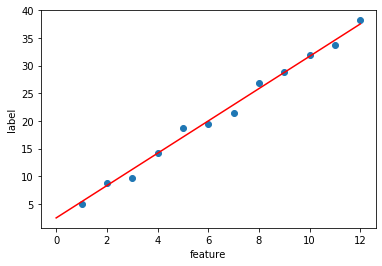

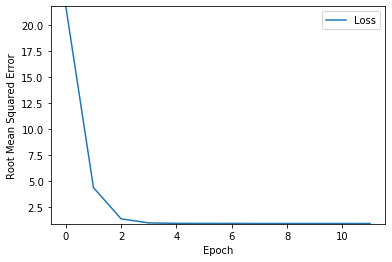

In [21]:
learning_rate = 1
epochs = 12
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/100
12/12 [==============================] - 1s 49ms/sample - loss: 805.8535 - root_mean_squared_error: 28.3876
Epoch 2/100
12/12 [==============================] - 0s 3ms/sample - loss: 733.4976 - root_mean_squared_error: 27.0832
Epoch 3/100
12/12 [==============================] - 0s 2ms/sample - loss: 684.2573 - root_mean_squared_error: 26.1583
Epoch 4/100
12/12 [==============================] - 0s 3ms/sample - loss: 644.9033 - root_mean_squared_error: 25.3949
Epoch 5/100
12/12 [==============================] - 0s 1ms/sample - loss: 611.3179 - root_mean_squared_error: 24.7248
Epoch 6/100
12/12 [==============================] - 0s 3ms/sample - loss: 581.6098 - root_mean_squared_error: 24.1166
Epoch 7/100
12/12 [==============================] - 0s 1ms/sample - loss: 554.7315 - root_mean_squared_error: 23.5527
Epoch 8/100
12/12 [==============================] - 0s 1ms/sample - loss: 530.0355 - root_mean_squared_error: 23.0225
Epoch 9/100
12/12 [========

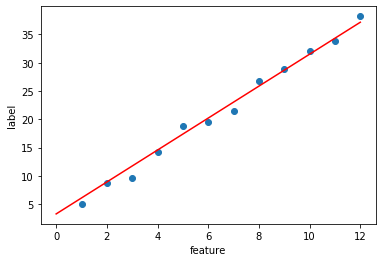

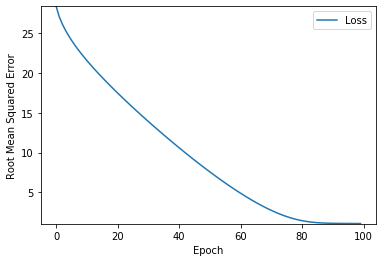

In [22]:
learning_rate = 0.05
epochs = 100
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Train on 12 samples
Epoch 1/100
12/12 [==============================] - 1s 81ms/sample - loss: 1214.4838 - root_mean_squared_error: 34.8494
Epoch 2/100
12/12 [==============================] - 0s 1ms/sample - loss: 1125.2675 - root_mean_squared_error: 33.5450
Epoch 3/100
12/12 [==============================] - 0s 3ms/sample - loss: 1063.8054 - root_mean_squared_error: 32.6160
Epoch 4/100
12/12 [==============================] - 0s 1ms/sample - loss: 1014.2351 - root_mean_squared_error: 31.8471
Epoch 5/100
12/12 [==============================] - 0s 1ms/sample - loss: 971.5984 - root_mean_squared_error: 31.1705
Epoch 6/100
12/12 [==============================] - 0s 1ms/sample - loss: 933.6131 - root_mean_squared_error: 30.5551
Epoch 7/100
12/12 [==============================] - 0s 1ms/sample - loss: 899.0142 - root_mean_squared_error: 29.9836
Epoch 8/100
12/12 [==============================] - 0s 2ms/sample - loss: 867.0179 - root_mean_squared_error: 29.4452
Epoch 9/100
12/12 [====

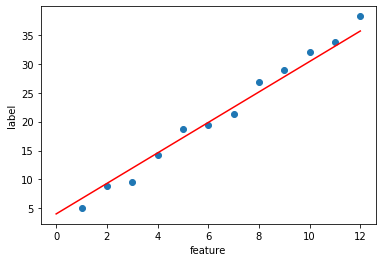

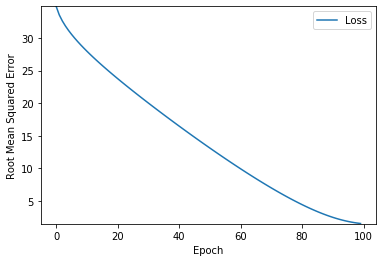

In [23]:
learning_rate = 0.05
epochs = 100
my_batch_size = 1

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)